<a href="https://colab.research.google.com/github/McNealFielies/McNealFielies.github.io/blob/main/Medical_Cost_Prediction_Using_XGBReg_and_Linear_Reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What Is The Goal for this Project?

= The Goal for this Project to see if smoking, Age, Childern, Region has a inpact on Medical Cost

In this project we will use KMEans Cluster, Linear Regression


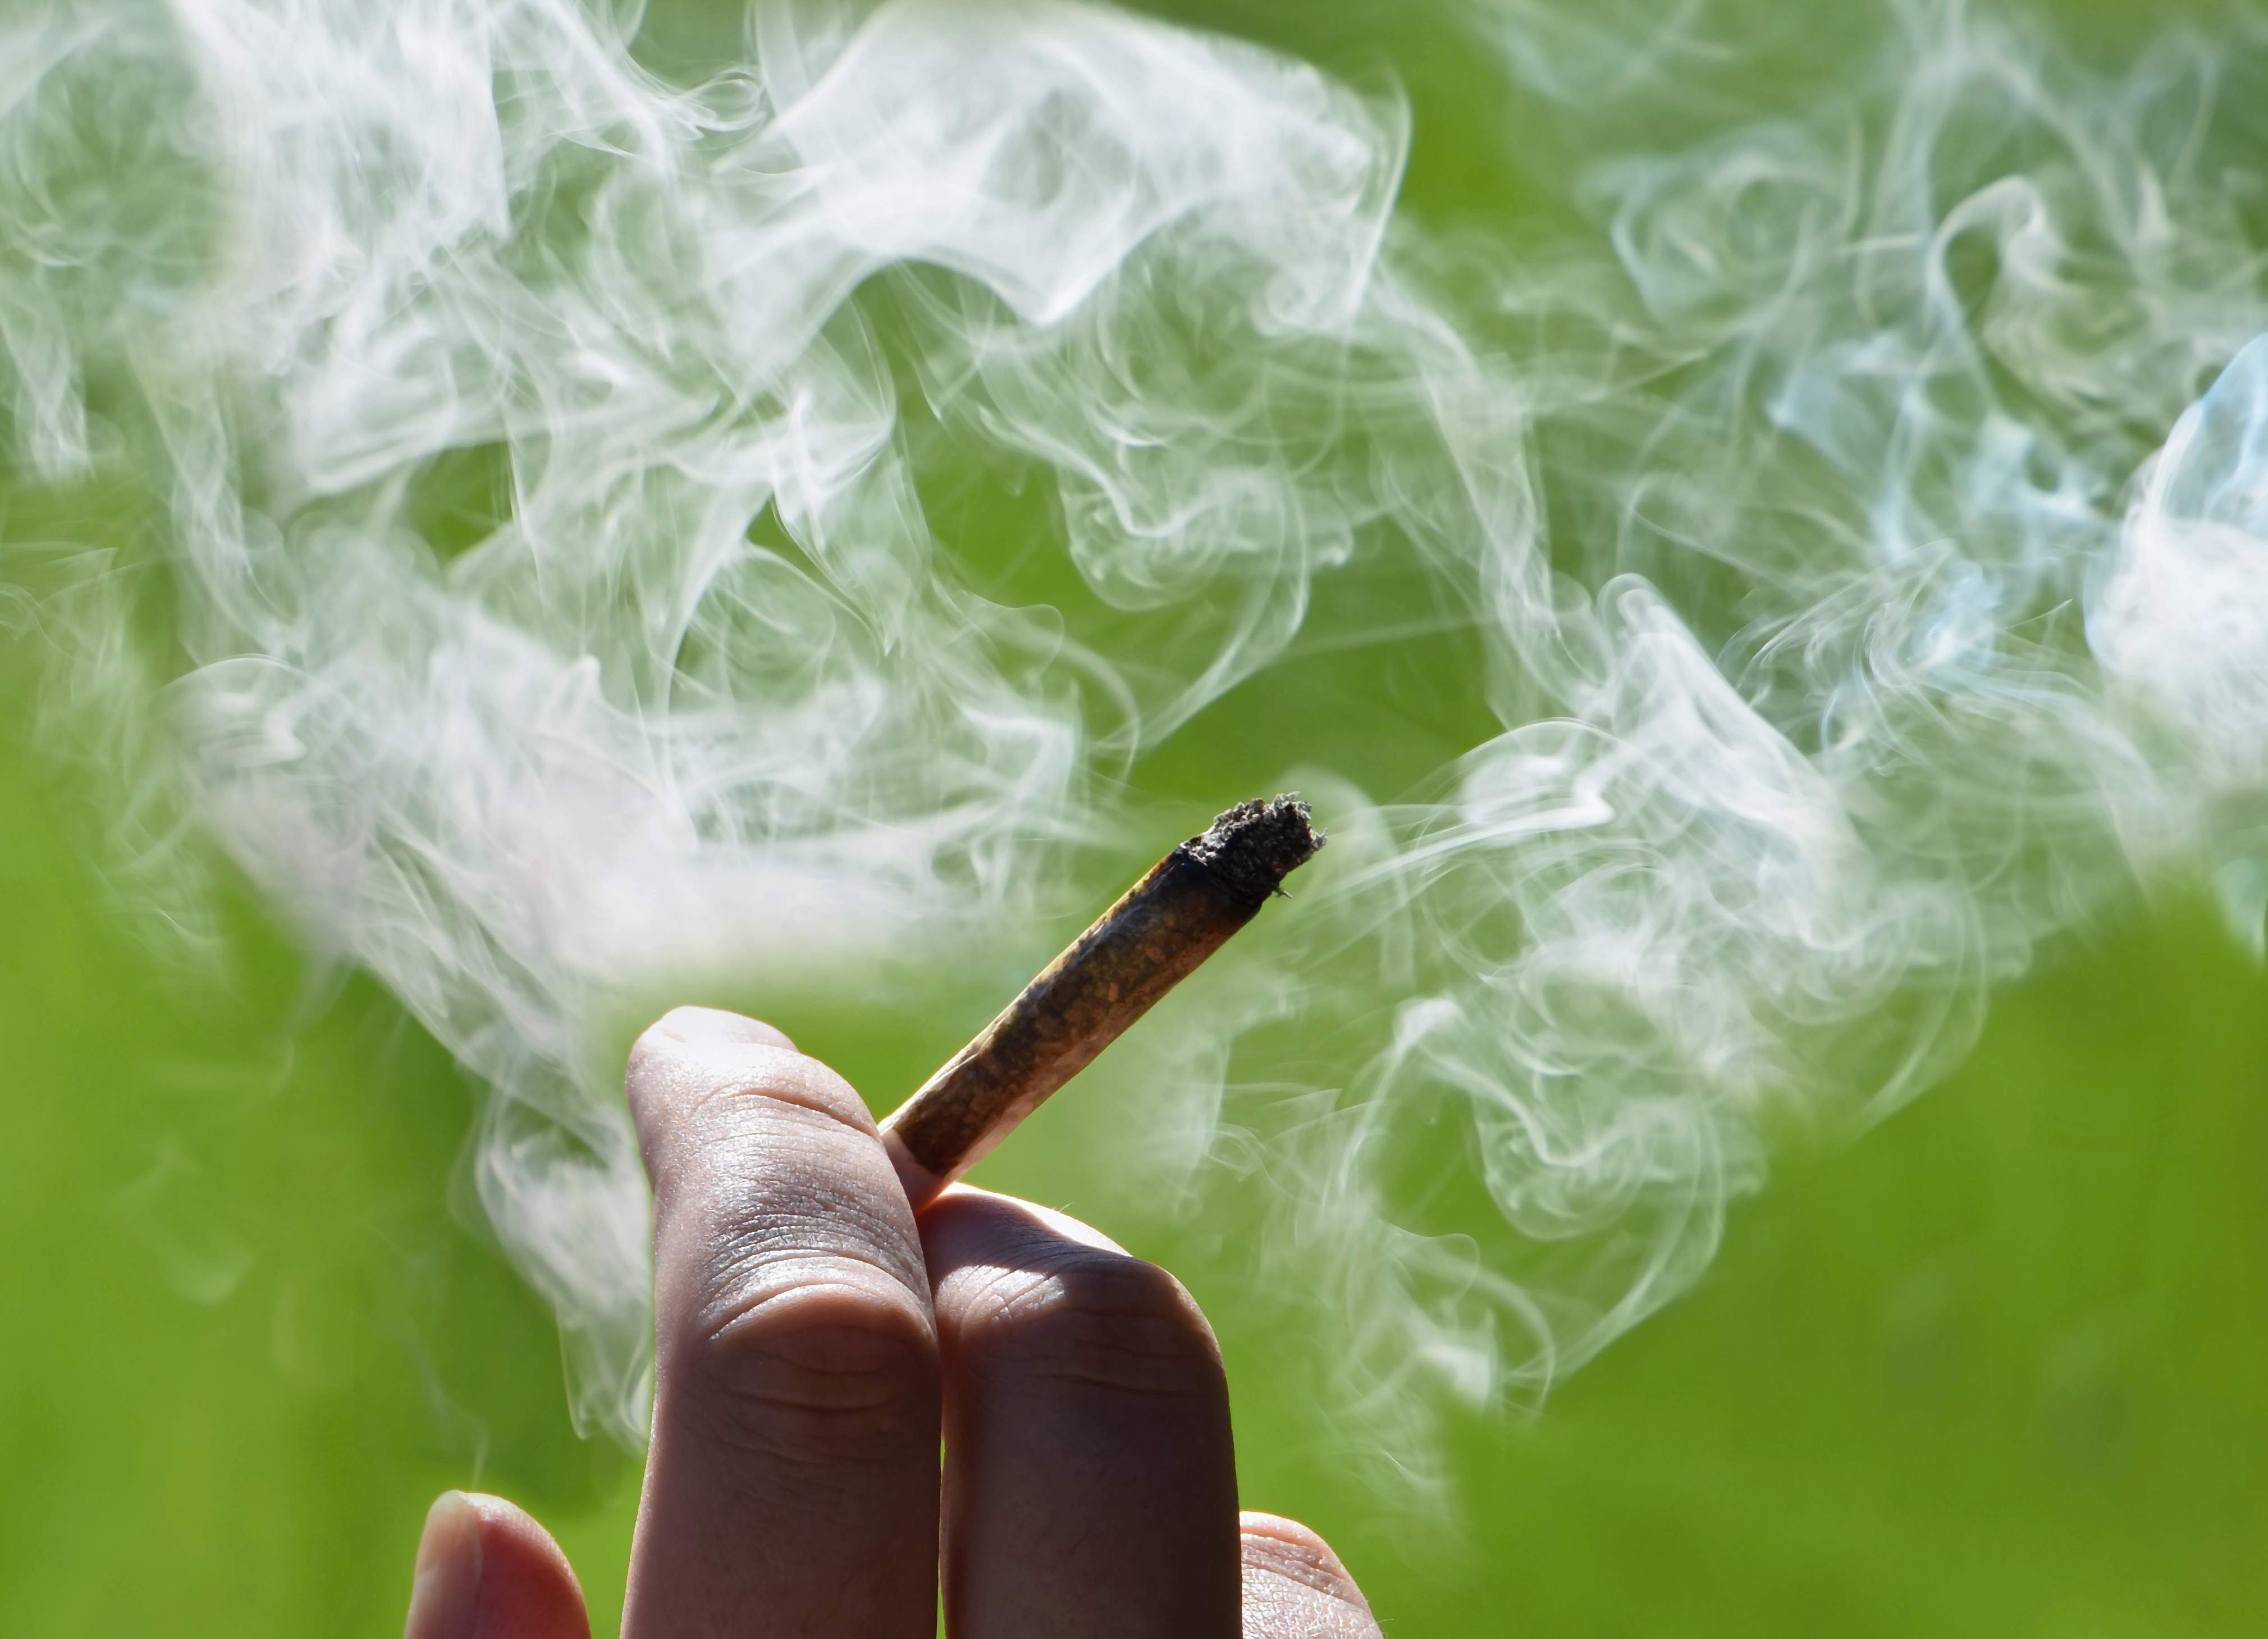

Columns

**age**: age of primary beneficiary

**sex**: insurance contractor gender, female, male

**bmi**: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

**children**: Number of children covered by health insurance / Number of dependents

**smoker**: Smoking

**region**: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

charges: Individual medical costs billed by health insurance

In [1]:
# Importing the necessery libiries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor

In [2]:
# adding the data to a pandas datafame

df = pd.read_csv('/content/insurance.csv')

In [3]:
# The First 5 Rows

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# Let's have a look at how many rows and columns we have
df.shape

(1338, 7)

In [5]:
# Information about the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
# Let's see if there are any missing values in the dataset

df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
# Let's have a look at the descriptive statistics

df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# **Explotory Data Analysis**

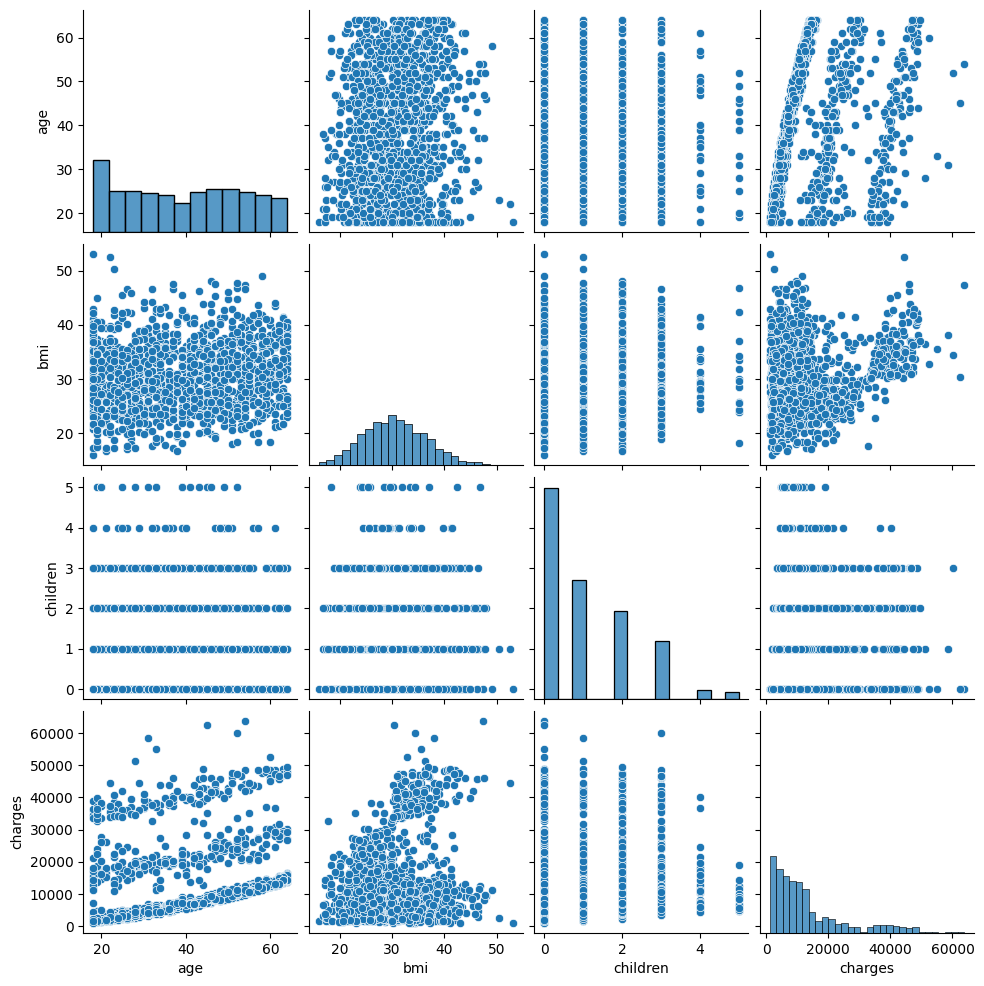

In [8]:
sns.pairplot(df)

<ipython-input-9-2bc989d017a0>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


<Axes: >

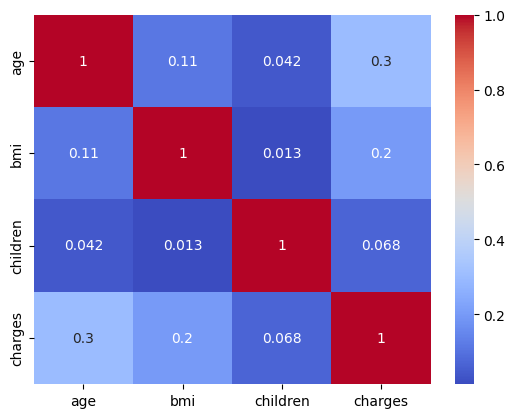

In [9]:
# Lets have a look at the correlation between each feature

sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

<Figure size 1000x900 with 0 Axes>

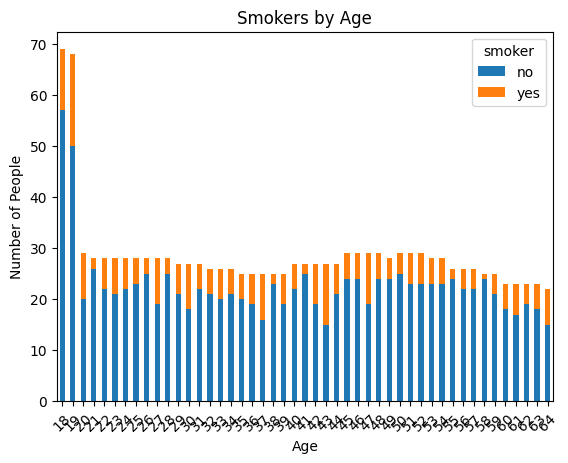

In [10]:
plt.figure(figsize=(10, 9))
age_groups = df.groupby('age')['smoker'].value_counts().unstack().fillna(0)
# Plotting the data
age_groups.plot(kind='bar', stacked=True)
# Set labels and title
plt.xlabel('Age')
plt.ylabel('Number of People')
plt.title('Smokers by Age')
plt.xticks(rotation=45)
# Display the plot
plt.show()

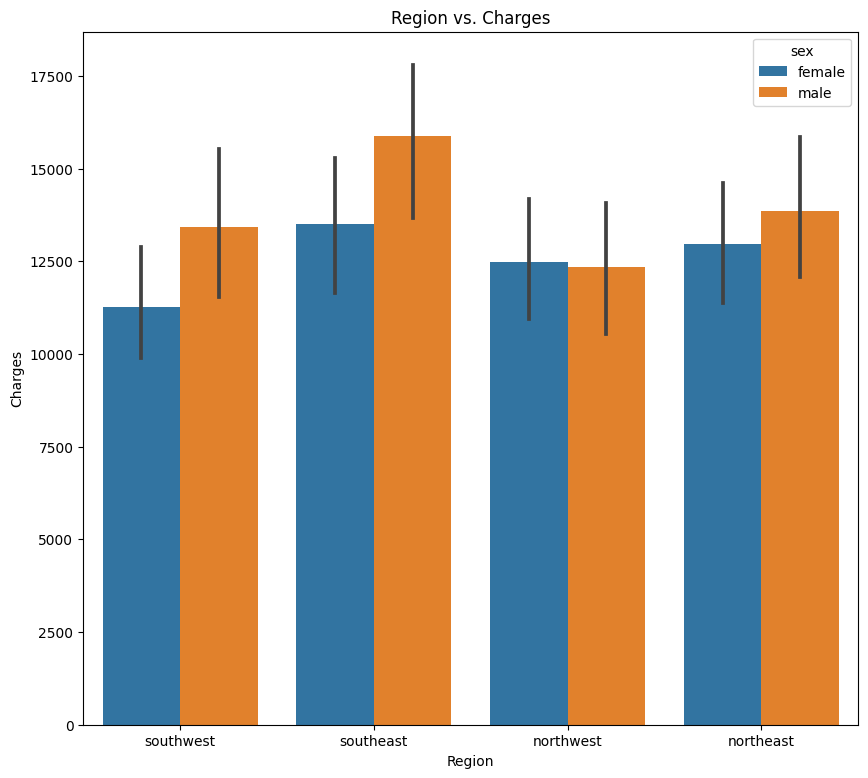

In [11]:
plt.figure(figsize=(10, 9))
sns.barplot(data=df, x='region', y='charges', hue='sex')
plt.xlabel('Region')
plt.ylabel('Charges')
plt.title('Region vs. Charges')
plt.show()

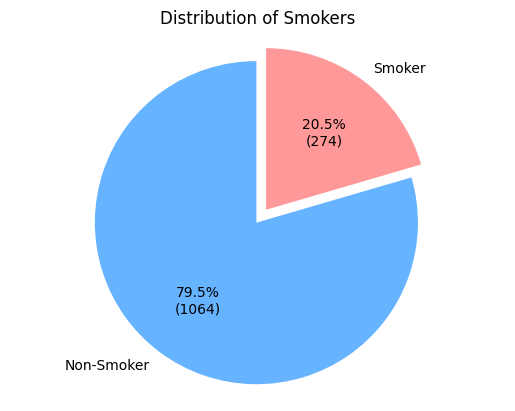

In [12]:

# Count the number of smokers and non-smokers
smoker_counts = df['smoker'].value_counts()

# Calculate the total number of people
total_count = smoker_counts.sum()

# Calculate the percentage of smokers and non-smokers
smoker_percentage = (smoker_counts / total_count) * 100

# Plotting the data
labels = ['Non-Smoker', 'Smoker']
sizes = smoker_counts.values
explode = (0, 0.1)  # Explode the 'Smoker' slice
colors = ['#66b3ff', '#ff9999']

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct=lambda p: f'{p:.1f}%\n({p * total_count / 100:.0f})',
        startangle=90)

# Set title
plt.title('Distribution of Smokers')

# Display the plot
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

In [13]:
#sex
le = LabelEncoder()

le.fit(df.sex.drop_duplicates())
df.sex = le.transform(df.sex)

#smokers
le.fit(df.smoker.drop_duplicates())
df.smoker = le.transform(df.smoker)

#Region
le.fit(df.region.drop_duplicates())
df.region = le.transform(df.region)

# **Changing Categorical to Numerical Values**

# **Train Test Split the data into Features and Target**

In [14]:
X = df.drop(['charges'], axis=1)
Y = df['charges']

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [16]:
print(X.shape, X_test.shape, X_train.shape)

(1338, 6) (268, 6) (1070, 6)


In [17]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    0  27.900         0       1       3
1      18    1  33.770         1       0       2
2      28    1  33.000         3       0       2
3      33    1  22.705         0       0       1
4      32    1  28.880         0       0       1
...   ...  ...     ...       ...     ...     ...
1333   50    1  30.970         3       0       1
1334   18    0  31.920         0       0       0
1335   18    0  36.850         0       0       2
1336   21    0  25.800         0       0       3
1337   61    0  29.070         0       1       1

[1338 rows x 6 columns]


In [18]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


# **Model Building**

## **1. XGB Regressor**

In [19]:
# Loading the model
model = XGBRegressor()

In [20]:
# fitting the data into the model

model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

# **Model Evalution**


Now lets predict on our training model


In [21]:
training_data_prediction = model.predict(X_train)

In [22]:
print(training_data_prediction)

[ 2246.7498  6669.7617 12066.657  ... 12765.457  10286.194  12437.771 ]


In [23]:
# R Square Error

score_1 = metrics.r2_score(Y_train, training_data_prediction)

# Mean Absolute Error

score_2 = metrics.mean_absolute_error(Y_train, training_data_prediction)

print("The R Square Error :", score_1)
print("The Mean Absolute Error :", score_2)

The R Square Error : 0.9957660171907602
The Mean Absolute Error : 460.8173068246897


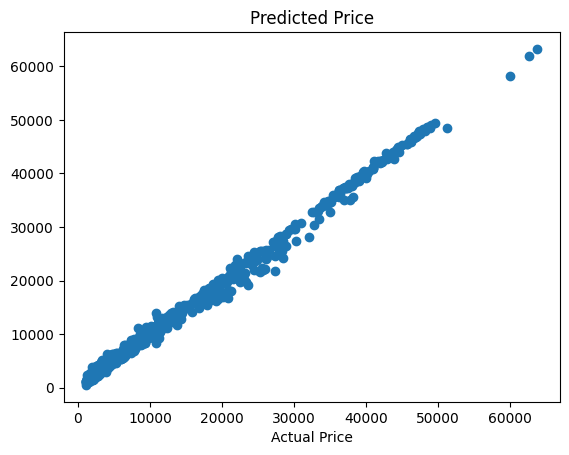

In [24]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel('Actual Price')
plt.title("Predicted Price")
plt.show()


Now lets predict on our training model

In [25]:
testing_data_prediction = model.predict(X_test)

In [26]:
print(testing_data_prediction)

[ 3799.448   11144.453   13219.308    3508.884    8188.1426  11188.633
  1682.5175   3852.193   23768.488    7566.1694  11100.291    1931.7542
 17640.168    2498.6628   9498.843   12589.1455   2564.038    7448.921
 22168.3      3323.7393  12144.241    2524.5227  45973.44    20671.787
 38226.547    9576.918    4122.9727   7791.482    4418.03     3432.189
  7330.0947   7596.2993   7040.7334   3185.2302   6339.249   12145.241
 37850.49     4509.9556  17811.834   13309.395     910.1322  36094.24
  6862.6846   1314.1964   8892.978    5942.179   11290.47    11532.373
  4884.2266   9777.485    3287.0613    645.9537  17889.94    43578.824
  6664.981   13098.655    3672.0125   8928.436    8097.893   38944.99
 15907.817    -221.40286  4310.032   43927.59     1379.9171  16939.78
 11028.366    7523.402   13760.782   11888.182   10115.702   15191.895
 11209.579    7018.3647  12764.977    8252.385     877.87036  1644.2694
  2371.8381  15146.92    16845.932    8986.089     960.79895 15174.348
 11800.

In [27]:
# R Square Error

score_3 = metrics.r2_score(Y_test, testing_data_prediction)

# Mean Absolute Error

score_4 = metrics.mean_absolute_error(Y_test, testing_data_prediction)

print("The R Square Error :", score_3)
print("The Mean Absolute Error :", score_4)

The R Square Error : 0.8244198401779491
The Mean Absolute Error : 2964.0366240273365


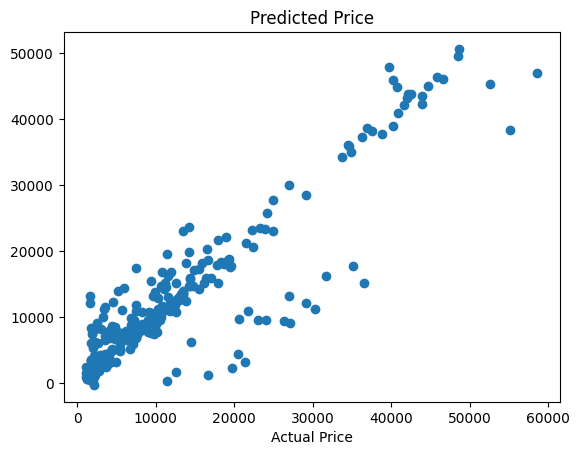

In [28]:
plt.scatter(Y_test, testing_data_prediction)
plt.xlabel('Actual Price')
plt.title("Predicted Price")
plt.show()

# **2. Linear Regression**

Model

In [29]:
lin_model_reg = LinearRegression()

In [30]:
lin_model_reg.fit(X_train, Y_train)

LinearRegression()

# **Model Evaluation (Linear Regression)**

In [31]:
# Prediction on the training data

training_data_prediction_lin_model_reg = lin_model_reg.predict(X_train)

In [32]:
# R Square Error

error_score = metrics.r2_score(Y_train, training_data_prediction_lin_model_reg)

print('The R Square Error : ', error_score)

The R Square Error :  0.7519923667088932


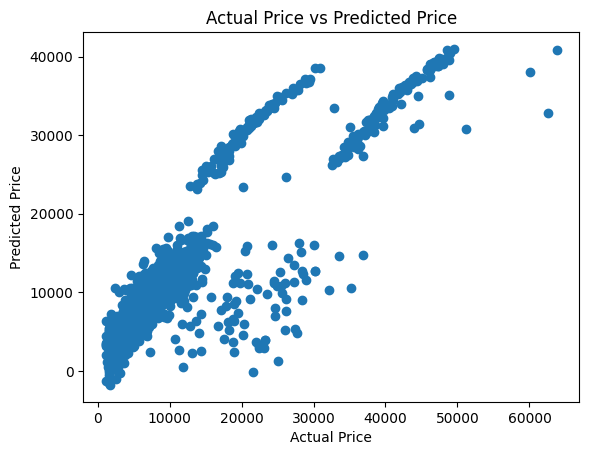

In [34]:
plt.scatter(Y_train, training_data_prediction_lin_model_reg)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()

In [35]:
# Prediction on the test data

test_data_prediction_lin_model_reg = lin_model_reg.predict(X_test)

In [38]:
# R Square Error

error_score_2 = metrics.r2_score(Y_test, test_data_prediction_lin_model_reg)

print('The R Square Error : ', error_score_2)

The R Square Error :  0.7445422986536503


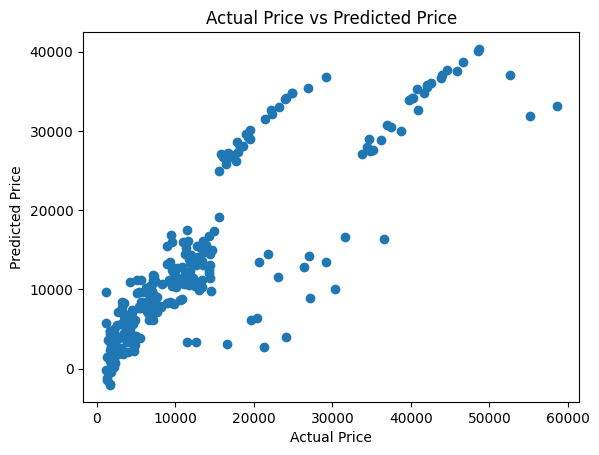

In [39]:
plt.scatter(Y_test, test_data_prediction_lin_model_reg)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()